<h2 style="font-weight: 700; text-align: center">Best First Search (BeFS) for Graph Node Search</h2>

<h4> Graph Reference </h4><span style="font-size: 14px">[Graph 1 is represented in the Cartesian system as accurately as possible (more information about the problem unlocked Best First Search)]</span>

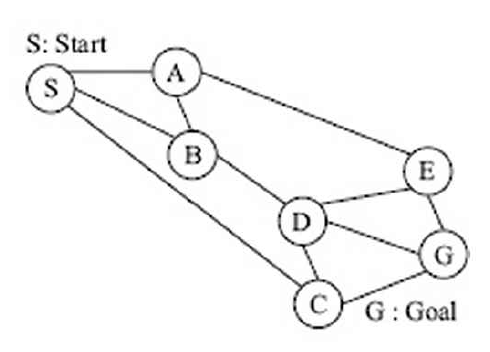

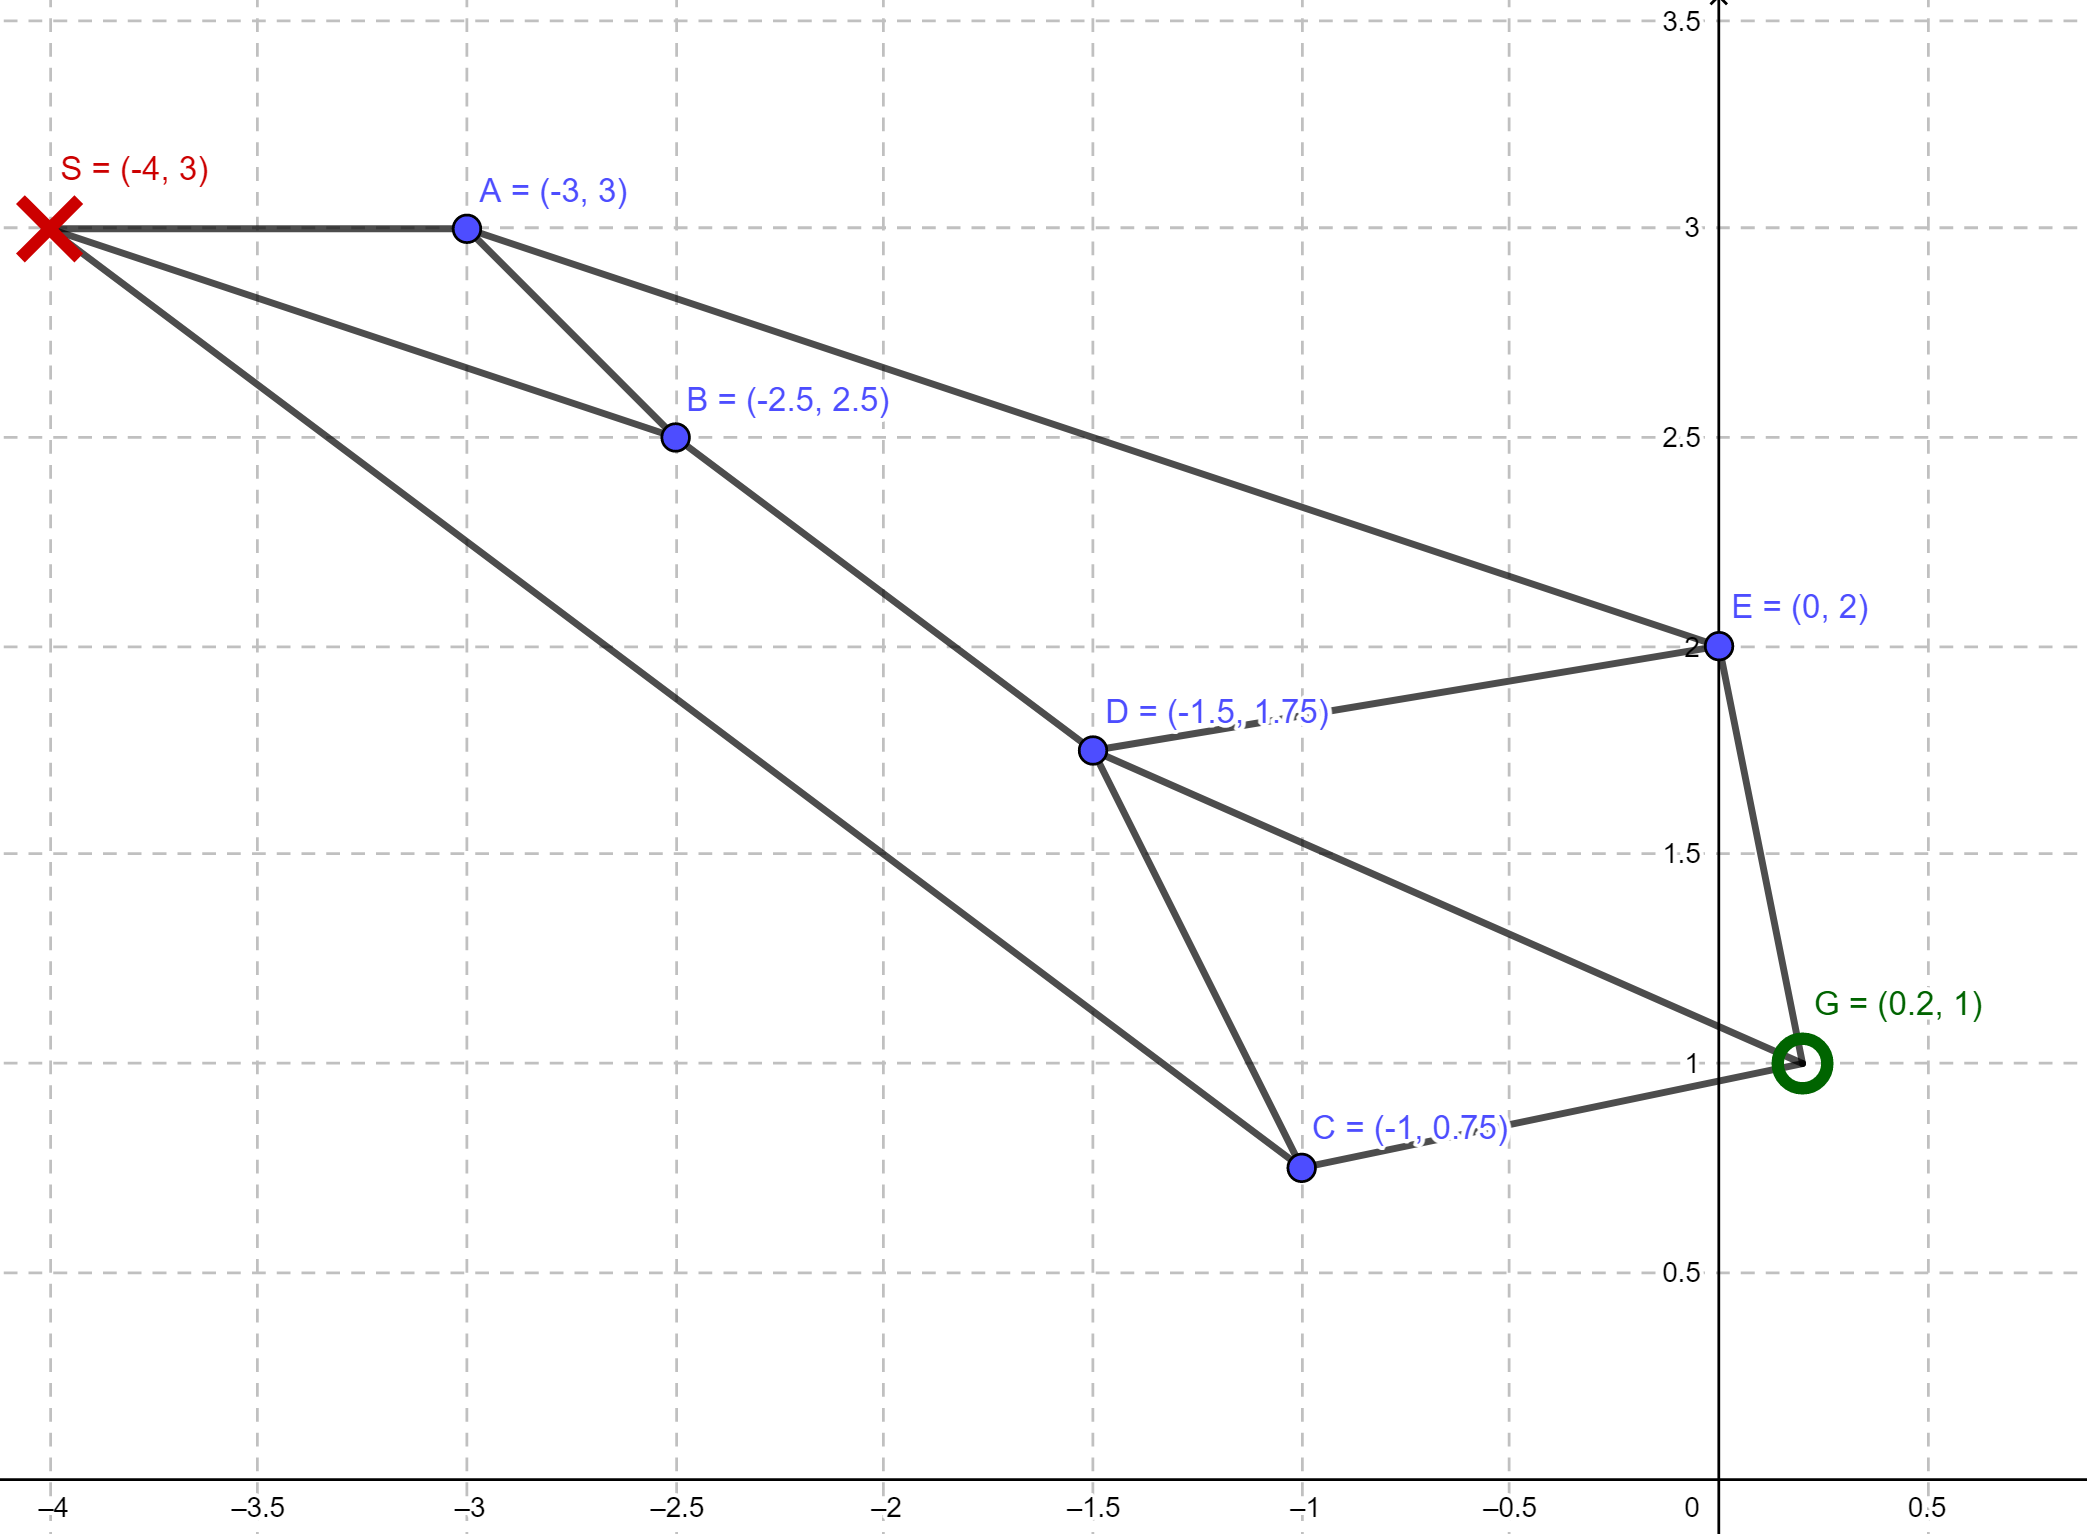

In [87]:
from IPython.display import Image, display
I1 = Image(filename="../../Graphs/Graph_1_ref.png", width=275, height=200)
I2 = Image(filename="../../Graphs/Graph_1_ggb_ref.png", width=800, height=400)
display(I1, I2)

#### Graph Representation (More Informed)

In [88]:

#~ An unweighed undirected graph represented as a hashmap/dictionary of Parent node (key) and connected children and the co-ordinate of the parent node
graph = { "S": [["A", "B", "C"], (-4, 3)],
          "A": [["B", "E", "S"], (-3, 3)],
          "B": [["A", "D", "S"], (-2.5, 2.5)],
          "C": [["D", "G", "S"], (-1, 0.75)],
          "D": [["B", "C", "E", "G"], (-1.5, 1.75)],
          "E": [["A", "D", "G"], (0, 2)],
          "G": [["C", "D", "E"], (0.2, 1)],
        }

<p style="font-size: 16px"><b>The Heuristic (Approximate Dist. - Straight Line Dist. - Euclidean Dist.) Function</b> --> Distance of the node from the Goal </p>

In [89]:
def calc_heuristic(from_coords, to_coords):
  return ((from_coords[0] - to_coords[0]) ** 2 + (from_coords[1] - to_coords[1]) ** 2) ** 0.5

<p style="font-size: 16px">Primary data structures (OPEN and CLOSED) will work on <i>Parent-child-hn(of parent)</i> pairs(tuples)</p>

In [90]:
def make_pair(to_, from_, heuristic):
  return (to_, from_, heuristic)

<p style="font-size: 16px"><b>MoveGen</b> -> Generates new nodes and moves the process of searching forward</p>

In [91]:
def befs_move_gen(graph, parent, goal):
  new_nodes = [make_pair(new, parent, calc_heuristic(graph[new][1], graph[goal][1])) for new in graph[parent][0]]     
  return new_nodes

<p style="font-size: 16px"><b>Remove seen Function</b></p>

###### Remove_seen checks *both* the *CLOSED* and *OPEN* lists in DFS and so it does in BeFS

In [92]:
def befs_remove_seen(new_nodes, OPEN, CLOSED):
  cleansed = []
  OPEN_ = [n[0] for n in OPEN]        # only the children, not the whole pair 
  CLOSED_ = [n[0] for n in CLOSED]
  for node in new_nodes:
    if node[0] not in OPEN_ and node[0] not in CLOSED_:   # if and only if the new node is not already in OPEN and CLOSED, add it
      cleansed.append(node)
  return cleansed

<p style="font-size: 16px"><b>Reconstruct path</b> -> When Goal node is found, this functions returns the exact path taken to reach to it</p>

In [93]:
def reconstruct_path(OPEN, CLOSED):
  path = [OPEN.pop(0)]
  node = path[0]

  while node[1] != "NIL":
    for m in CLOSED:
      if node[1] == m[0]:
        path.append(m)
        node = m
  return path

<p style="font-size: 16px"><b>Print path</b> -> Utility function to print the final path prettily</p>

In [94]:
def print_path(path):
  for node_ix in range(len(path)):
    if node_ix != len(path) - 1:
      print(f"\033[38;5;214m{path[node_ix][0]}", end="\033[38;5;207m -> \033[0m")
    else:  
      print(f"\033[38;5;214m{path[node_ix][0]}")

<p style="font-size: 20px"><b>Core working function</b></p>

In [95]:
def graph_befs(graph, start, goal):
  try:
    OPEN = [make_pair(start, "NIL", calc_heuristic(graph[start][1], graph[goal][1]))]
  except KeyError:
    print("\033[38;5;197mNode doesn't exist, cannot calculate distance!\033[0m")
    return

  CLOSED = []
  
  while len(OPEN) != 0:
    print("OPEN: ", OPEN)
    if OPEN[0][0] == goal:
      print("Path from Source to Goal:", end=" ")
      print_path(reconstruct_path(OPEN, CLOSED)[::-1])
      return
    else:
      CLOSED.append(OPEN.pop(0))
      new_nodes = befs_move_gen(graph, CLOSED[-1][0], goal)
      # print(new_nodes)
      new_nodes = befs_remove_seen(new_nodes, OPEN, CLOSED)
      [OPEN.insert(0, i) for i in new_nodes]        
      OPEN.sort(key = lambda x: x[2]) # "Priority queue(Sorted List) implementation in BeFS"
  print("\033[38;5;197mGoal not found...\033[0m")

<p style="font-size: 20px">Function Calls</p>

<p style="font-size: 20px"><b>For the graph set above ↑</b></p>

<p style="font-size: 16px">Case 1: Simple <b>Start (S)</b> to <b>Goal (G)</b> searching</p>

In [96]:
graph_befs(graph, "S", "G")

OPEN:  [('S', 'NIL', 4.651881339845203)]
OPEN:  [('C', 'S', 1.2257650672131262), ('B', 'S', 3.0886890422961004), ('A', 'S', 3.773592452822642)]
OPEN:  [('G', 'C', 0.0), ('D', 'C', 1.8580904176062045), ('B', 'S', 3.0886890422961004), ('A', 'S', 3.773592452822642)]
Path from Source to Goal: S -> C -> G


<p style="font-size: 16px">Case 2: Goal is not present</p>

In [97]:
graph_befs(graph, "A", "H")

Node doesn't exist, cannot calculate distance!


<p style="font-size: 16px">Case 3: Begins with Goal itself</p>

In [98]:
graph_befs(graph, "G", "G")

OPEN:  [('G', 'NIL', 0.0)]
Path from Source to Goal: G
